Aerodinâmica I - Escoamentos Elementares

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Campos de velocidade

In [ ]:
x , y = sp.symbols('x y')

# η = função corrente/potencial

def corrente(η):
  u = sp.lambdify((x, y), η.diff(y))
  v = sp.lambdify((x, y), -η.diff(x))
  return u, v

def potencial(η):
  u = sp.lambdify((x, y), η.diff(x))
  v = sp.lambdify((x, y), η.diff(y))
  return u, v

Gráficos

In [ ]:
# Campo vetorial
def vetorial(ax, u, v):
  Y, X =  np.ogrid[-10:10:100j, -10:10:100j]
  speed = np.sqrt(u(X, Y)**2 + v(X, Y)**2)
  strm = ax.streamplot(X, Y, u(X, Y), v(X, Y), color=speed, cmap='plasma', density=1.3)
  plt.colorbar(strm.lines, ax=ax, label='Intensidade do vetor |v|')

# Linhas de corrente
def linhas(ax, u, v):
  Y, X =  np.ogrid[-10:10:100j, -10:10:100j]
  speed = np.sqrt(u(X, Y)**2 + v(X, Y)**2)
  ax.streamplot(X, Y, u(X, Y), v(X, Y), density=0.8, color='gray', arrowstyle='-')

Funções de cada escoamento

In [ ]:
# Módulo do vetor posição
R = sp.sqrt(x**2+y**2)

# Ângulo polar [rad]
θ = sp.atan2(y, x)

# V: Velocidade [L/T^2]
def uniforme(V):
  return V*R*sp.sin(θ)

# Λ: Intensidade da fonte/sorvedouro [L^2/T]
def fonte_sorvedouro(Λ):
  return Λ*θ/(2*sp.pi)

# l: Distância entre fonte e sorvedouro (dipolo) [L]
def dipolo(Λ, l):
  return -(Λ*l)*sp.sin(θ)/(2*sp.pi*R)

# Γ: Circulação [L^2/T]
def vortice(Γ):
  return (Γ/(2*sp.pi))*sp.log(R)

Escoamento Elementar tipo Uniforme

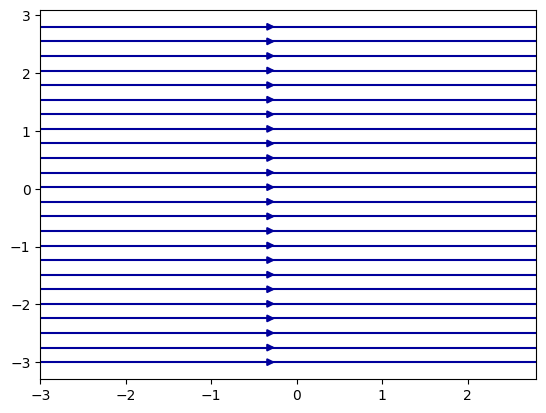

In [ ]:
X,Y = np.meshgrid( np.arange(-3,3,.2), np.arange(-3,3,.2) )

u = np.ones(X.shape)
v = np.zeros(Y.shape)

plt.figure()
plt.streamplot(X,Y,u,v,color='#00009C', density=0.8)

Escoamentos Elementares tipo Fonte, Sorvedouro, Dipolo, Vortice, Cilindro com sustentação

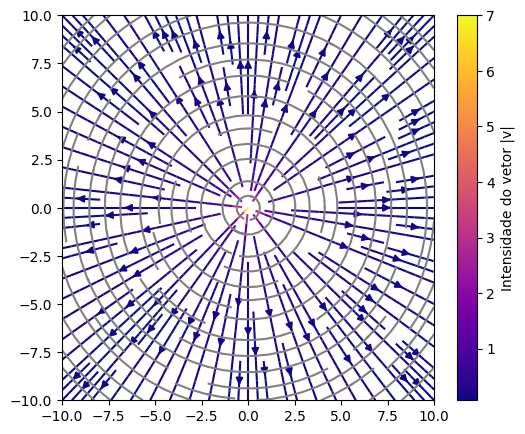

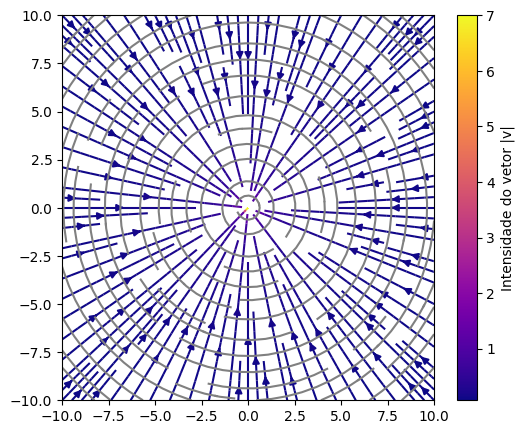

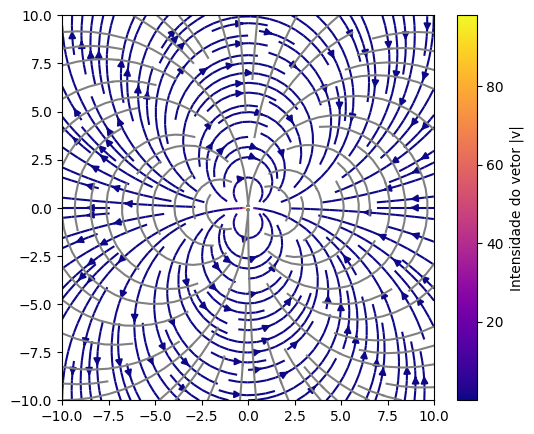

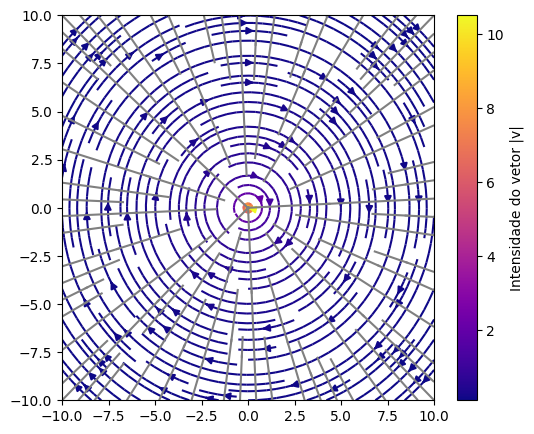

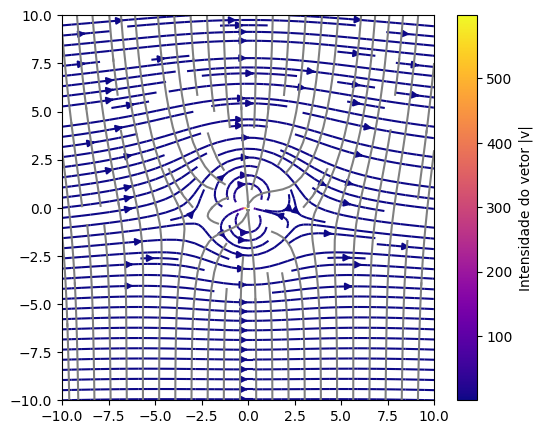

In [ ]:
η_vet = [fonte_sorvedouro(2*sp.pi),fonte_sorvedouro(-2*sp.pi),dipolo(2*sp.pi, 2),vortice(3*sp.pi),uniforme(2) + dipolo(8*sp.pi, 3) + vortice(4*sp.pi)]

for η in η_vet:
  u, v = corrente(η)
  u_eq, v_eq = potencial(η)

  # Plot
  fig, ax = plt.subplots(figsize=(6, 5))
  vetorial(ax, u, v)
  linhas(ax, u_eq, v_eq)